In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [5]:
myanmar_map = gpd.read_file('/Users/catherinefuller/galvanize/daimil10/projects/Mid_Term/Myanmar_Food/shapefiles/mmr_polbnda_adm0_250k_mimu_1 (1)/mmr_polbnda_adm0_250k_mimu_1.shp')

<Axes: >

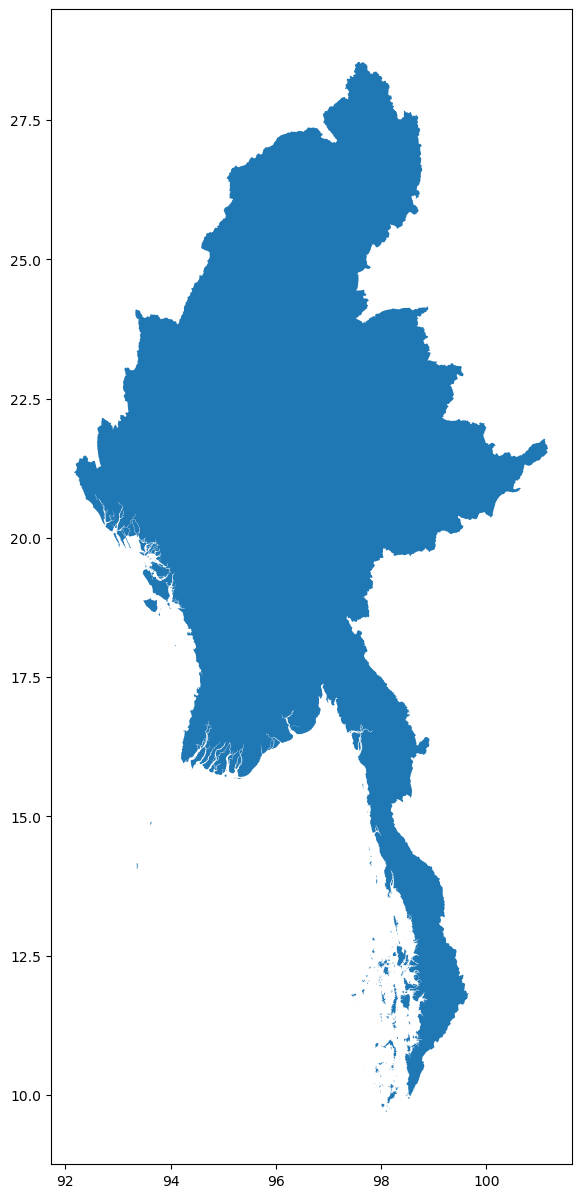

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
myanmar_map.plot(ax=ax)

In [7]:
#Read CSV
map_df = pd.read_csv('/Users/catherinefuller/galvanize/daimil10/projects/Mid_Term/Myanmar_Food/data/wfp_food_prices_mmr 2.csv')

In [9]:
#Remove first row
map_df.drop(index=map_df.index[0], axis=0, inplace=True)

In [12]:
map_df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,cereals and tubers,Rice (low quality),KG,actual,Retail,MMK,400.00,63.08
2,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (chicken),KG,actual,Retail,MMK,3636.36,573.44
3,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (pork),KG,actual,Retail,MMK,3636.36,573.44
4,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Onions,KG,actual,Retail,MMK,969.70,152.92
5,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Tomatoes,KG,actual,Retail,MMK,484.85,76.46


In [13]:
#Clean Data- Convert time to Datetime

map_df['date'] = pd.to_datetime(map_df['date'])

#Clean Date - Convert the price columns to float
map_df['price'] = map_df['price'].astype(float).round(2)
map_df['usdprice'] = map_df['usdprice'].astype(float).round(2)

#Clean Lat Long - Convert lat/long to float
map_df['latitude'] = map_df['latitude'].astype(float)
map_df['longitude'] = map_df['longitude'].astype(float)

In [ ]:
map_df.info()

In [19]:
map_example = map_df.iloc[:20]

In [20]:
geometry = [Point(xy) for xy in zip(map_df['longitude'], map_df['latitude'])]

In [21]:
geometry[:20]

[<POINT (97.44 25.342)>,
 <POINT (97.44 25.342)>,
 <POINT (97.44 25.342)>,
 <POINT (97.44 25.342)>,
 <POINT (97.44 25.342)>,
 <POINT (94.917 20.15)>,
 <POINT (94.917 20.15)>,
 <POINT (94.871 20.459)>,
 <POINT (95.204 21.537)>,
 <POINT (95.204 21.537)>,
 <POINT (95.204 21.537)>,
 <POINT (92.443 20.68)>,
 <POINT (92.527 20.87)>,
 <POINT (92.527 20.87)>,
 <POINT (92.527 20.87)>,
 <POINT (92.339 21.088)>,
 <POINT (92.339 21.088)>,
 <POINT (92.371 20.821)>,
 <POINT (92.371 20.821)>,
 <POINT (92.371 20.821)>]

In [26]:
myanmar_geo = gpd.GeoDataFrame(map_df, #specify our data
                          #crs=crs #specify our coordinate reference system
                          geometry=geometry)

In [27]:
myanmar_geo.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,geometry
1,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,cereals and tubers,Rice (low quality),KG,actual,Retail,MMK,400.00,63.08,POINT (97.44001 25.34222)
2,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (chicken),KG,actual,Retail,MMK,3636.36,573.44,POINT (97.44001 25.34222)
3,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,"meat, fish and eggs",Meat (pork),KG,actual,Retail,MMK,3636.36,573.44,POINT (97.44001 25.34222)
4,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Onions,KG,actual,Retail,MMK,969.70,152.92,POINT (97.44001 25.34222)
5,2008-01-15,Kachin,Myitkyina,Wai Maw,25.34222,97.44001,vegetables and fruits,Tomatoes,KG,actual,Retail,MMK,484.85,76.46,POINT (97.44001 25.34222)


<Axes: >

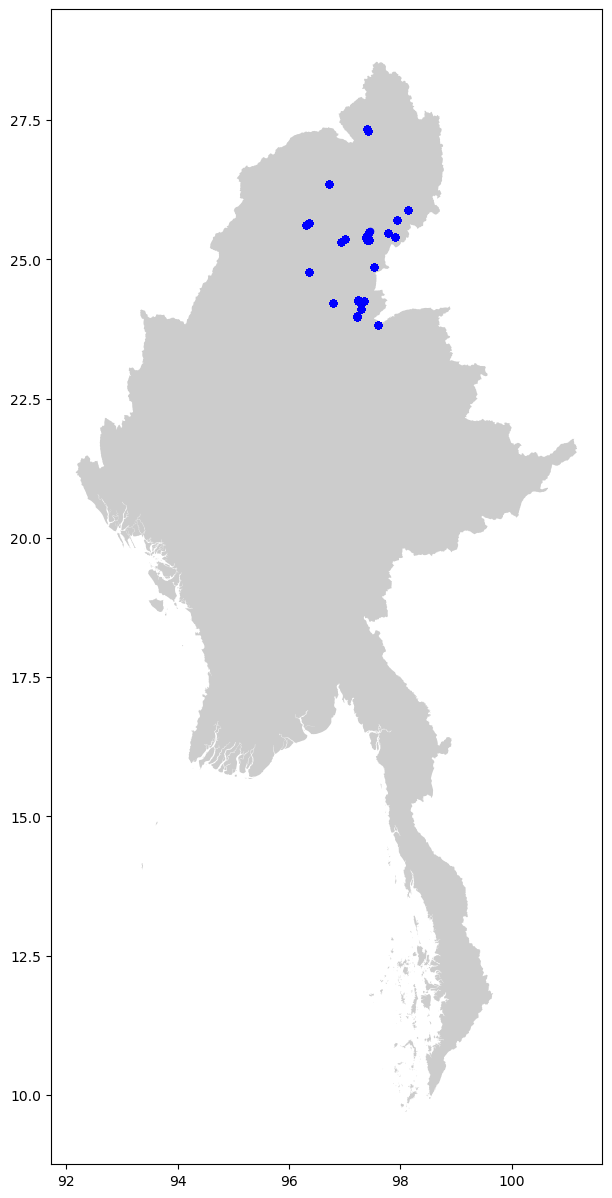

In [28]:
fig, ax = plt.subplots(figsize=(15,15))
myanmar_map.plot(ax=ax, alpha=0.4, color='grey')
myanmar_geo[myanmar_geo['admin1'] == 'Kachin'].plot(ax=ax, 
                                       markersize=20, 
                                       color='blue', 
                                       marker='o', 
                                       label='Neg')